In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import math

After importing the necessary packages, let's load up the dataset and preview it.

In [2]:
df = pd.read_csv('NDAP_REPORT_6000.csv')
df.head()

,ROWID,Country,State lgd code,State,District lgd code,District,Sub-District lgd Code,Sub-District,ULB_RLB_Village lgd Code,ULB_RLB_Village,...,Number of female marginal workers in household industry who worked for 0 to 3 months,Number of marginal workers as Other workers who worked for 0 to 3 months,Number of male marginal workers as Other workers who worked for 0 to 3 months,Number of female marginal workers as Other workers who worked for 0 to 3 months,Number of Non workers,Number of male Non workers,Number of female Non workers,Source Year,YearCode,Year
0,585,India,24,GUJARAT,442,BHARUCH,999999,Unknown SubDistricts of India,9802612,Valia (Naldhari) (INA),...,0,0,0,0,0,0,0,2011,2011,"Calendar Year (Jan - Dec), 2011"
1,637,India,24,GUJARAT,459,SURAT,3937,Majura,802631,Surat,...,0,0,0,0,0,0,0,2011,2011,"Calendar Year (Jan - Dec), 2011"
2,1498,India,21,ODISHA,350,CUTTACK,2954,Choudwar,399316,Industrial Area (OG),...,0,0,0,0,1,1,0,2011,2011,"Calendar Year (Jan - Dec), 2011"
3,2062,India,5,UTTARAKHAND,54,RUDRA PRAYAG,290,Ukhimath,800296,Kedarnath,...,0,0,0,0,8,8,0,2011,2011,"Calendar Year (Jan - Dec), 2011"
4,4150,India,1,JAMMU AND KASHMIR,3,BARAMULLA,39,Tangmarg,800009,Municipal Committee Gulmarg Tangmarg,...,0,0,0,0,3,1,2,2011,2011,"Calendar Year (Jan - Dec), 2011"


In [3]:
corr_matrix = df.corr(numeric_only=True)
print(type(corr_matrix))

<class 'pandas.core.frame.DataFrame'>


Now let's take a look at the correlation matrix, as a heatmap and also as a csv to inspect specific values closer.

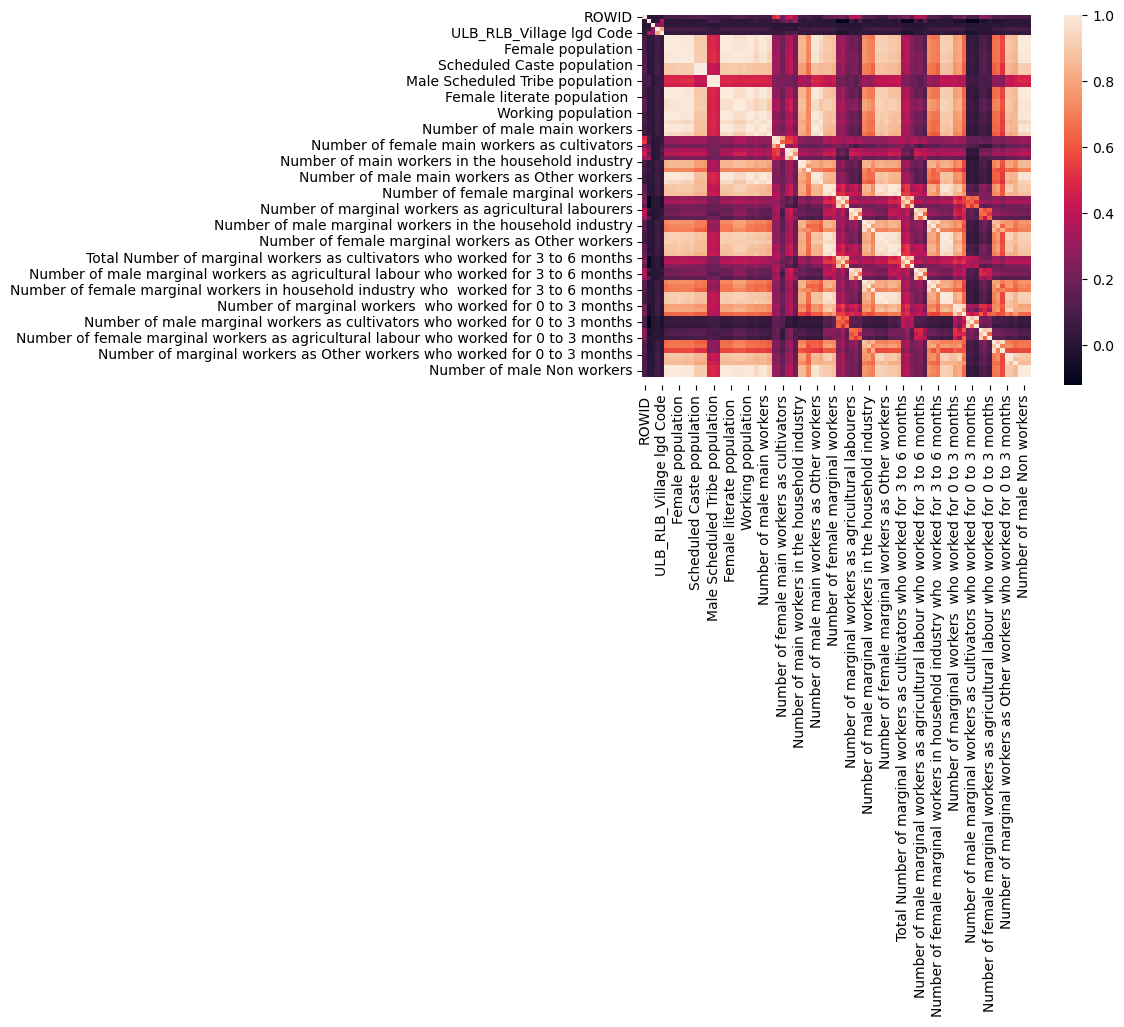

In [4]:
sns.heatmap(corr_matrix)
corr_matrix.to_csv("corr.csv")

##### A surprisingly large number of real-life variables seem to have a large correlation!
Anyone with even a few days experience of data analysis knows that it is incredibly rare for a pair of real-world variables (that are not directly consequents of each other) to have correlations greater than 0.9, yet here we have it for many pairs of variables.

On some thought, I realized that this high correlation comes from a simple fact: big towns have a lot of everything, and small towns have a little of everything. To overcome this, we must:
#### Deal with ratios and not raw counts


Hence, let's proceed to make a dataframe with ratios/percentages of certain counts.

In [5]:
def ratio(row, ro1, ro2):
    if row[ro2] == 0:
        return 0
    return(row[ro1]/row[ro2])

The above defines a simple function we will use to create new columns from data in the original dataframe. 

#### Question 1 
Do literacy rates have any correlation with the gender ratio? Other factors?

In [6]:
rat_df = pd.DataFrame()
rat_df['Percent Illiterate'] = df.apply(lambda row: ratio(row, "Illiterate population", "Population"), axis=1)
rat_df['Percent Women Illiterate'] = df.apply(lambda row: ratio(row, "Female illiterate population ", "Female population"), axis=1)
rat_df['Percent Men Illiterate'] = df.apply(lambda row: ratio(row, "Male illiterate population ", "Male population"), axis=1)
rat_df['Male to Female'] = df.apply(lambda row: ratio(row, "Male population", "Female population"), axis=1)
rat_df['Percent Marginal Workers'] = df.apply(lambda row: ratio(row, "Number of marginal workers", "Population"), axis=1)
rat_df['Percent Male Marginal Workers'] = df.apply(lambda row: ratio(row, "Number of male marginal workers", "Male population"), axis=1)
rat_df['Percent Female Marginal Workers'] = df.apply(lambda row: ratio(row, "Number of female marginal workers", "Female population"), axis=1)

In [7]:
rat_df['Percent Working'] = df.apply(lambda row: ratio(row, "Working population", "Population"), axis=1)
rat_df['Percent Male Working'] = df.apply(lambda row: ratio(row, "Male working population", "Male population"), axis=1)
rat_df['Percent Female Working'] = df.apply(lambda row: ratio(row, "Female Woking population", "Female population"), axis=1)
rat_df['Percent Main Working'] = df.apply(lambda row: ratio(row, "Number of main workers", "Population"), axis=1)
rat_df['Percent Male Main Working'] = df.apply(lambda row: ratio(row, "Number of male main workers", "Male population"), axis=1)
rat_df['Percent Female Main Working'] = df.apply(lambda row: ratio(row, "Number of female main worker", "Female population"), axis=1)

<Axes: >

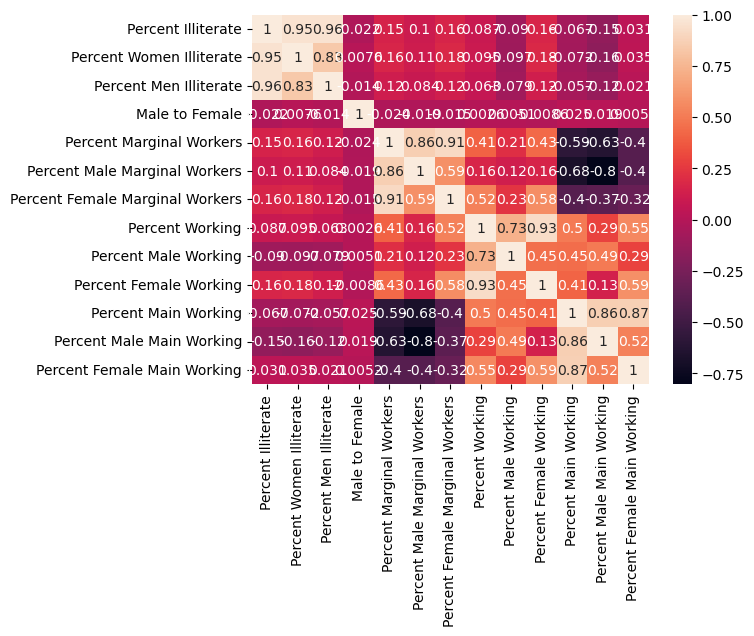

In [8]:
corr1 = rat_df.corr(numeric_only=True)

sns.heatmap(corr1, annot=True)

In [9]:
corr1['Percent Illiterate']

Percent Illiterate                 1.000000
Percent Women Illiterate           0.950814
Percent Men Illiterate             0.955529
Male to Female                    -0.021630
Percent Marginal Workers           0.151913
Percent Male Marginal Workers      0.104821
Percent Female Marginal Workers    0.159790
Percent Working                    0.087485
Percent Male Working              -0.089583
Percent Female Working             0.162967
Percent Main Working              -0.066800
Percent Male Main Working         -0.145576
Percent Female Main Working        0.030566
Name: Percent Illiterate, dtype: float64

From the above data, it appears that there is a significant correlation (not necessarily causation) between illiteracy and percentage of marginal workers in a society (especially female). 
Also, illiteracy has a strong correlation with percentage of females working, but not percentage of females working main jobs. 

Finally, illiteracy has a significant **negative** correlation with percentage of men working main jobs. 

Also, gender ratio has negligible correlation with literacy.

What this indicates is that communities with high literacy tend to have a higher percentage of men working full-time jobs, and a lower percentage of people working marginal jobs, especially women (and vice-versa for low literacy).

---
#### Question 2
What factors differentiate between male and female literacy rates?

In [10]:
corr1['Percent Men Illiterate'] - corr1['Percent Women Illiterate']

Percent Illiterate                 0.004714
Percent Women Illiterate          -0.168795
Percent Men Illiterate             0.168795
Male to Female                    -0.021467
Percent Marginal Workers          -0.044944
Percent Male Marginal Workers     -0.027913
Percent Female Marginal Workers   -0.052735
Percent Working                   -0.031719
Percent Male Working               0.018534
Percent Female Working            -0.057706
Percent Main Working               0.014596
Percent Male Main Working          0.035576
Percent Female Main Working       -0.014627
dtype: float64

Clearly, of the factors explored, the one differentiating male and female literacy the most is percentage of female marginal workers. 
The high negative difference shows that the portion of female marginal workers tends to increase with female illiteracy far more than male illiteracy. This may be an indicating factor that females work marginal jobs due to their illiteracy more often than illiteracy prevalent in society; however, we must be careful in our assumptions since correlation does not imply causation. 

Once again, the male-to-female ratio is not a large contributing factor. 

An interesting thing to notice is that percentage of men working main jobs has a significantly higher correlation with the difference we are observing than percent female main workers, or percent male marginal workers. This may suggest that men working full-time jobs encourage female literacy more than their counterparts in marginal jobs, and may hold more ability to enforce it than women working full-time jobs. While this seems like a very sound and plausible argument, since we have not been given any time-dependant data, we can only draw correlations between different factors; we cannot, in any way, conclude a causal theory. 

---
#### Question 3
Does presence of SC population have any correlation with literacy rates? Other observations?

In [11]:
rat_df['Percent SC'] = df.apply(lambda row: ratio(row, "Scheduled Caste population", "Population"), axis=1)
rat_df['Percent ST'] = df.apply(lambda row: ratio(row, "Scheduled Tribe population", "Population"), axis=1)

In [12]:
corr1 = rat_df.corr(numeric_only=True)

corr1['Percent SC']

Percent Illiterate                -0.072668
Percent Women Illiterate          -0.056296
Percent Men Illiterate            -0.078544
Male to Female                     0.007111
Percent Marginal Workers          -0.036941
Percent Male Marginal Workers     -0.000753
Percent Female Marginal Workers   -0.057891
Percent Working                   -0.088514
Percent Male Working              -0.012252
Percent Female Working            -0.109826
Percent Main Working              -0.043290
Percent Male Main Working         -0.006685
Percent Female Main Working       -0.069847
Percent SC                         1.000000
Percent ST                        -0.353426
Name: Percent SC, dtype: float64

There does not seem to be a significant correlation of SC population with most factors we have already enlisted.

There seems to be a significant **negative** correlation between percent SC population and percent female working. One can draw many casual theories from this data, however, like stated above, one cannot state any of these with any surety based on the given data.

We must also note that percent SC population has a low negative correlation with illiteracy (total, male and female). While this cannot be neglected and can be used as evidence to support other theories, the correlation is too low to formulate a theory based solely on it.

---

#### Question 4
Does presence of ST population have any correlation with working or literacy rates?

In [13]:
corr1['Percent ST']

Percent Illiterate                 0.335075
Percent Women Illiterate           0.289596
Percent Men Illiterate             0.345821
Male to Female                    -0.029090
Percent Marginal Workers           0.196872
Percent Male Marginal Workers      0.115496
Percent Female Marginal Workers    0.222493
Percent Working                    0.268550
Percent Male Working               0.083254
Percent Female Working             0.317862
Percent Main Working               0.050820
Percent Male Main Working         -0.051313
Percent Female Main Working        0.147811
Percent SC                        -0.353426
Percent ST                         1.000000
Name: Percent ST, dtype: float64

Unlike the correlations with the SC population we say above, we see that the ST population of an area has high correlations with a lot of employment and literacy parameters. This may be a result of ST people being alienated by society more, or them living a different lifestyle from the ordinary person, or neither. All we can say for sure is that an area having a large portion of ST population is likely to have a different demographic status than the average. Below, I will try to summarize the strongest takeaways.

Firstly, ST population has a surprisingly strong positive correlation with illiteracy (across gender). Again, based on the given data, we cannot comment on whether they have been denied access to education, or do not treat it as a priority themselves, or any other theory.

Secondly, there is a strong correlation between perent of ST population and percent of people working marginal jobs (all genders), and percent women working full-time jobs. Across all jobs, the percent of ST population tends to increase alongside female employment quite strongly, whereas there less to no correlation with male employment. While we cannot comment on what exactly the impact is, we can say that heavy ST populations impact women's employment far more than men's.

Lastly, and quite unexpectedly, there is an very strong negative correlation (strongest of all factors considered, with percent ST) between SC and ST populations. I will address this next. 

---

#### Question 5
Is there anything more to be learnt regarding the negative correlation between percent SC and percent ST populations?

In [14]:
def add(row, ro1, ro2): # a function we will use soon
    if row[ro2] == 0:
        return 0
    return(row[ro1] + row[ro2])

In [15]:
df['SC+ST'] = df.apply(lambda row: add(row, "Scheduled Caste population", "Scheduled Tribe population"), axis=1)
rat_df['Percent SC+ST'] = df.apply(lambda row: ratio(row, "SC+ST", "Population"), axis=1)
rat_df['Population'] = df['Population']

In [16]:
corr1 = rat_df.corr(numeric_only=True)
corr1["Percent SC+ST"]

Percent Illiterate                 0.302371
Percent Women Illiterate           0.261849
Percent Men Illiterate             0.311406
Male to Female                    -0.030246
Percent Marginal Workers           0.182853
Percent Male Marginal Workers      0.103568
Percent Female Marginal Workers    0.209962
Percent Working                    0.276367
Percent Male Working               0.112449
Percent Female Working             0.315493
Percent Main Working               0.071054
Percent Male Main Working         -0.023356
Percent Female Main Working        0.157463
Percent SC                        -0.167938
Percent ST                         0.918102
Percent SC+ST                      1.000000
Population                        -0.017839
Name: Percent SC+ST, dtype: float64

0.1953268411164247


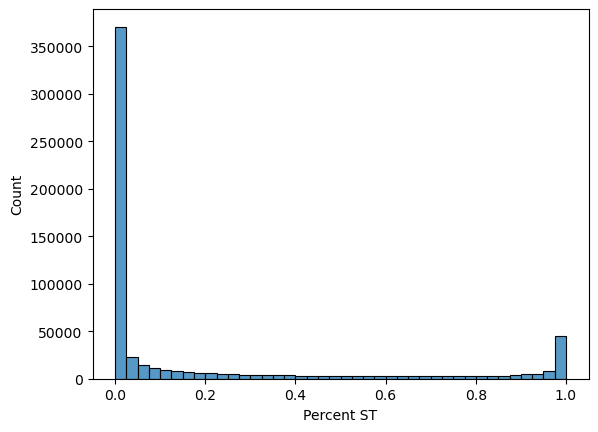

In [17]:
sns.histplot(rat_df["Percent ST"], bins=40)
print(np.mean(rat_df["Percent ST"]))

0.1745910480313497


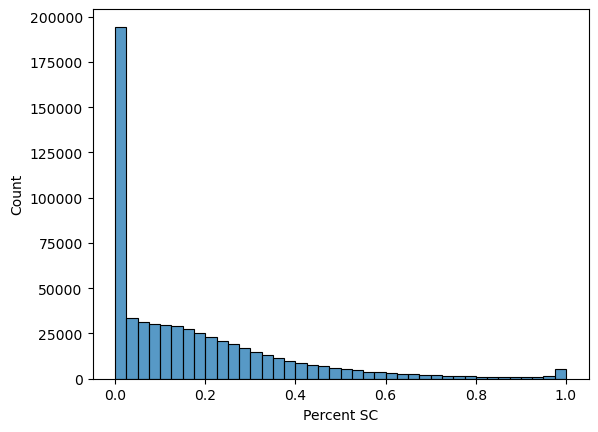

In [18]:
sns.histplot(rat_df["Percent SC"], bins=40)
print(np.mean(rat_df["Percent SC"]))

After some more correlation analysis, I got the idea of plotting the SC and ST percentages as a histogram. As you can see, both histograms look seomwhat similar, in such that the vast majority of villages have ST population percentages very close to 0%, or very close to 100%, with very few villages having intermediate values. One can say the same statement for the SC population distribution, with more villages having intermediate values.

What this distribution of SC and ST populations shows that most villages have negligible percentage of ST population, hence putting its mean value much closer to 0 than 1. The sizeable deviations from its mean occur when it takes values close to 100% for a village (since intermediate values are very rare), and since almost the entire village belongs to ST population, there is close to 0% of SC population in said village. Hence, they usually go in opposite directions from their means (~0.18 for both) together, and thus, they have a high negative correlation (when ST increases, SC below its mean). One could argue the same logic in reverse, but since the ST population distribution is much heavier at 0% and 100%, the logic is better understood this way. 

We conclude this analysis by saying that the high negative correlation between percent SC and percent ST is due to the way their individual populations are distributed, and is a statistical anomaly, not a representation of some real-world interaction/conflict between SC and ST populations. 

I personally found this question quite intellectually challenging, since it tested my understanding of statistics, required use of good data visualisation, and concluded in a statistical anomaly that requires in-depth study to not be misinterpreted. 

---

#### Question 6
What relation does percentage of cultivators have with other factors?

In [25]:
df['Cultivators'] = df.apply(lambda row: add(row, "Number of main workers as cultivators", "Number of marginal workers as cultivators"), axis=1)
df['Male Cultivators'] = df.apply(lambda row: add(row, "Number of male main workers as cultivators", "Number of male marginal workers as cultivators"), axis=1)
df['Female Cultivators'] = df.apply(lambda row: add(row, "Number of female main workers as cultivators", "Number of female marginal workers as cultivators"), axis=1)
rat_df['Percent Cultivators'] = df.apply(lambda row: ratio(row, "Cultivators", "Population"), axis=1)
rat_df['Percent Male Cultivators'] = df.apply(lambda row: ratio(row, "Male Cultivators", "Male population"), axis=1)
rat_df['Percent Female Cultivators'] = df.apply(lambda row: ratio(row, "Female Cultivators", "Female population"), axis=1) 

In [26]:
corr1 = rat_df.corr(numeric_only=True)

print(np.mean(rat_df["Percent Cultivators"]))
print(corr1["Percent Cultivators"])

0.14460639600957612
Percent Illiterate                 0.016533
Percent Women Illiterate           0.040739
Percent Men Illiterate            -0.013062
Male to Female                    -0.019581
Percent Marginal Workers           0.228710
Percent Male Marginal Workers      0.067520
Percent Female Marginal Workers    0.313840
Percent Working                    0.427481
Percent Male Working               0.234007
Percent Female Working             0.444891
Percent Main Working               0.161303
Percent Male Main Working          0.081115
Percent Female Main Working        0.204478
Percent SC                        -0.102568
Percent ST                         0.100039
Percent SC+ST                      0.070863
Population                        -0.026748
Percent Cultivators                1.000000
Percent Male Cultivators           0.830979
Percent Female Cultivators         0.884573
Name: Percent Cultivators, dtype: float64


In [27]:
corr1 = rat_df.corr(numeric_only=True)

print(np.mean(rat_df["Percent Male Cultivators"]))
print(corr1["Percent Male Cultivators"])

0.16499163689057644
Percent Illiterate                 0.021510
Percent Women Illiterate           0.042367
Percent Men Illiterate            -0.002353
Male to Female                    -0.015826
Percent Marginal Workers           0.214236
Percent Male Marginal Workers      0.106022
Percent Female Marginal Workers    0.260310
Percent Working                    0.278127
Percent Male Working               0.208965
Percent Female Working             0.264246
Percent Main Working               0.042810
Percent Male Main Working          0.032357
Percent Female Main Working        0.048360
Percent SC                        -0.084475
Percent ST                         0.061009
Percent SC+ST                      0.040635
Population                        -0.022156
Percent Cultivators                0.830979
Percent Male Cultivators           1.000000
Percent Female Cultivators         0.600592
Name: Percent Male Cultivators, dtype: float64


In [28]:
corr1 = rat_df.corr(numeric_only=True)

print(np.mean(rat_df["Percent Female Cultivators"]))
print(corr1["Percent Female Cultivators"])

0.09937137183145212
Percent Illiterate                 0.002033
Percent Women Illiterate           0.024645
Percent Men Illiterate            -0.026303
Male to Female                    -0.018314
Percent Marginal Workers           0.273384
Percent Male Marginal Workers      0.103853
Percent Female Marginal Workers    0.358391
Percent Working                    0.467352
Percent Male Working               0.200785
Percent Female Working             0.513145
Percent Main Working               0.154181
Percent Male Main Working          0.029354
Percent Female Main Working        0.239407
Percent SC                        -0.087492
Percent ST                         0.103031
Percent SC+ST                      0.076704
Population                        -0.020586
Percent Cultivators                0.884573
Percent Male Cultivators           0.600592
Percent Female Cultivators         1.000000
Name: Percent Female Cultivators, dtype: float64


As can be seen from the data, there is no strong correlation between illiteracy and percent cultivators. Most of the correlation values with employment fields should be ignored, as cultivation is a form of working, and hence the fields between which correlation is being taken are in a set-subset relationship, influencing the data. However, it is interesting to note that the correlation with percent female marginal workers is significantly higher than that with percent male marginal workers, indicating that a lot of the female marginal workers are likely involved in cultivation, more so than their male counterparts. 

Also, we can notice the not-negligible-but-not-very-strong correlations, positive of ST with cultivation and negative of SC with cultivation. This suggests that many of those in the ST community are likely involved with cultivation, while the opposite may be true of the SC community. As a further inference, this trend in correlations is less prominent in men than women, indicating the above scenarios are more applicable to the women involved than the men.

---

#### Question 7

How does literacy influence percentages of full-time, marginal and non-workers?

In [82]:
rat_df['Percent Non-Workers'] = df.apply(lambda row: ratio(row, "Number of Non workers", "Population"), axis=1)
rat_df['Percent Male Non-Workers'] = df.apply(lambda row: ratio(row, "Number of male Non workers", "Male population"), axis=1)
rat_df['Percent Female Non-Workers'] = df.apply(lambda row: ratio(row, "Number of female Non workers", "Female population"), axis=1)

corr1 = rat_df.corr(numeric_only=True)

In [83]:
i = 0
for col in rat_df.columns:
    print(str(i) + "\t" + str(col))
    i += 1

0	Percent Illiterate
1	Percent Women Illiterate
2	Percent Men Illiterate
3	Male to Female
4	Percent Marginal Workers
5	Percent Male Marginal Workers
6	Percent Female Marginal Workers
7	Percent Working
8	Percent Male Working
9	Percent Female Working
10	Percent Main Working
11	Percent Male Main Working
12	Percent Female Main Working
13	Percent SC
14	Percent ST
15	Percent SC+ST
16	Population
17	Percent Cultivators
18	Percent Male Cultivators
19	Percent Female Cultivators
20	Percent Non-Workers
21	Percent Male Non-Workers
22	Percent Female Non-Workers


In [84]:
new_df = pd.DataFrame()
num_divs = 30
MainArr = [[0.0, 0] for _ in range(num_divs)]
MargArr = [[0.0, 0] for _ in range(num_divs)]
NonArr = [[0.0, 0] for _ in range(num_divs)]

# Below loop averages the percentages of different types of workers in certain baskets of literacy rate

for i, row in enumerate(rat_df.values):
    pIll, pMain, pMarg, pNon = row[0], row[10], row[4], row[20]
    k = math.floor(pIll*num_divs)
    if k == num_divs:
        k -= 1
    MainArr[k][0] = ((MainArr[k][0] * MainArr[k][1]) + pMain) / (MainArr[k][1] + 1)
    MainArr[k][1] += 1

    MargArr[k][0] = ((MargArr[k][0] * MargArr[k][1]) + pMarg) / (MargArr[k][1] + 1)
    MargArr[k][1] += 1

    NonArr[k][0] = ((NonArr[k][0] * NonArr[k][1]) + pNon) / (NonArr[k][1] + 1)
    NonArr[k][1] += 1

new_df['Illiteracy Percent'] = [(i + 0.5)*(100.0/num_divs) for i in range(num_divs)]
new_df['Main Working Percentage'] = [MainArr[i][0] for i in range(num_divs)]
new_df['Marginal Working Percentage'] = [MargArr[i][0] for i in range(num_divs)]
new_df['Non Working Percentage'] = [NonArr[i][0] for i in range(num_divs)]

<Axes: xlabel='Illiteracy Percent', ylabel='value'>

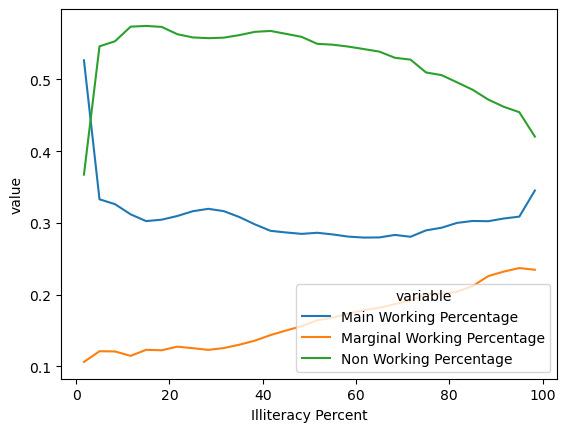

In [85]:
sns.lineplot(x='Illiteracy Percent', y='value', hue='variable', data=pd.melt(new_df, ['Illiteracy Percent']))

Clearly, from the above graph, we can understand the trends present. Also, note that we have taken the average across all villages, not the average across the entire population in those villages. This is to ensure that certain villages with large populations do not skew the average, and we get a better representation of the employment situations in said villages.

Firstly, the percentage of people with full-time jobs is very high for the most educated societies, but is practically constant for all others. The fact that full-time employment does not increase continuously with literacy suggests that literacy (and presence of more trained and educated workers) does not directly cause the high full-time employment in highly educated societies, but that they are correlated due to some other factors, say, through societal mindsets. 

Secondly, the non-working percentage is quite low in highly literate socities, suddenly increases and reaches a maxima around 20% illiteracy, and then steadily decreases with increasing illiteracy. This may indicate that in very high illiteracy is correlated with higher employment; one plausible reason is that poverty might be a common cause to both (denial to education, and more hands required to feed families). However, that is just a conjecture that requires more data to conclude. 

Thirdly, the percentage of marginal workers steadily increases with illiteracy. This reflects the fact that marginal workers have a lower literacy rate than full-time workers; however, we are not sure whether illiteracy causes people to take up marginal jobs or there are other societal factors at play. 

---

#### Question 8

Does literacy affect the nature of men's or women's employment more?


In [93]:
new_df = pd.DataFrame()
num_divs = 30
MainArr = [[0.0, 0] for _ in range(num_divs)]
MargArr = [[0.0, 0] for _ in range(num_divs)]
NonArr = [[0.0, 0] for _ in range(num_divs)]

# Below loop averages the percentages of different types of workers in certain baskets of literacy rate

for i, row in enumerate(rat_df.values):
    pIll, pMain, pMarg, pNon = row[2], row[11], row[5], row[21]
    k = math.floor(pIll*num_divs)
    if k == num_divs:
        k -= 1
    MainArr[k][0] = ((MainArr[k][0] * MainArr[k][1]) + pMain) / (MainArr[k][1] + 1)
    MainArr[k][1] += 1

    MargArr[k][0] = ((MargArr[k][0] * MargArr[k][1]) + pMarg) / (MargArr[k][1] + 1)
    MargArr[k][1] += 1

    NonArr[k][0] = ((NonArr[k][0] * NonArr[k][1]) + pNon) / (NonArr[k][1] + 1)
    NonArr[k][1] += 1

new_df['Male Illiteracy Percent'] = [(i + 0.5)*(100.0/num_divs) for i in range(num_divs)]
new_df['Male Main Working Percentage'] = [MainArr[i][0] for i in range(num_divs)]
new_df['Male Marginal Working Percentage'] = [MargArr[i][0] for i in range(num_divs)]
new_df['Male Non Working Percentage'] = [NonArr[i][0] for i in range(num_divs)]



newer_df = pd.DataFrame()
MainArr = [[0.0, 0] for _ in range(num_divs)]
MargArr = [[0.0, 0] for _ in range(num_divs)]
NonArr = [[0.0, 0] for _ in range(num_divs)]

# Below loop averages the percentages of different types of workers in certain baskets of literacy rate

for i, row in enumerate(rat_df.values):
    pIll, pMain, pMarg, pNon = row[1], row[12], row[6], row[22]
    k = math.floor(pIll*num_divs)
    if k == num_divs:
        k -= 1
    MainArr[k][0] = ((MainArr[k][0] * MainArr[k][1]) + pMain) / (MainArr[k][1] + 1)
    MainArr[k][1] += 1

    MargArr[k][0] = ((MargArr[k][0] * MargArr[k][1]) + pMarg) / (MargArr[k][1] + 1)
    MargArr[k][1] += 1

    NonArr[k][0] = ((NonArr[k][0] * NonArr[k][1]) + pNon) / (NonArr[k][1] + 1)
    NonArr[k][1] += 1

newer_df['Female Illiteracy Percent'] = [(i + 0.5)*(100.0/num_divs) for i in range(num_divs)]
newer_df['Female Main Working Percentage'] = [MainArr[i][0] for i in range(num_divs)]
newer_df['Female Marginal Working Percentage'] = [MargArr[i][0] for i in range(num_divs)]
newer_df['Female Non Working Percentage'] = [NonArr[i][0] for i in range(num_divs)]

<Axes: >

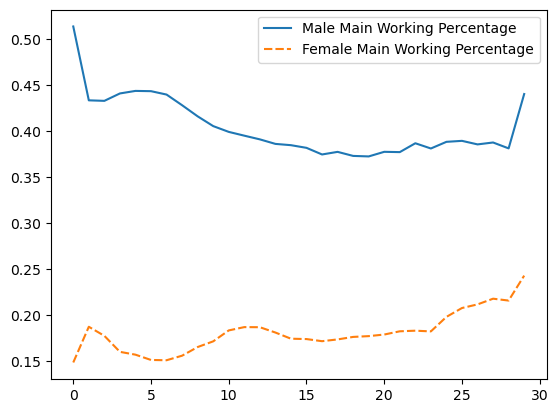

In [96]:
sns.lineplot(data=[new_df['Male Main Working Percentage'], newer_df["Female Main Working Percentage"]])

<Axes: >

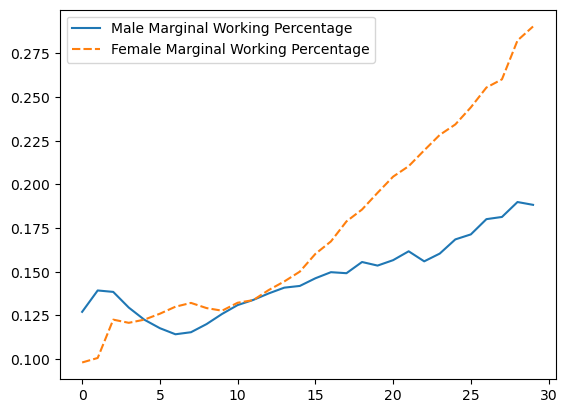

In [97]:
sns.lineplot(data=[new_df['Male Marginal Working Percentage'], newer_df["Female Marginal Working Percentage"]])

<Axes: >

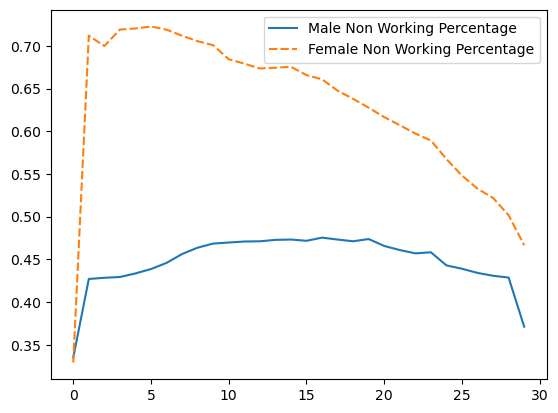

In [98]:
sns.lineplot(data=[new_df['Male Non Working Percentage'], newer_df["Female Non Working Percentage"]])

As can be seen very clearly from the graphs, the main working percentage of both men and women is relatively unaffected by the literacy rate (except in highly literate societies, which see a jump in male main occupations). 

However, regarding unemployment and marginal employment rates, we can see that the female rates are affected far more than the male rates by literacy. 

---

#### Question 9

Is there any difference of trends (with literacy) of marginal workers who worked 3-6 months and those who worked 0-3 months a year?

In [101]:
rat_df['Percent 3to6'] = df.apply(lambda row: ratio(row, "Number of marginal workers  who worked for 3 to 6 months", "Population"), axis=1)
rat_df['Percent Male 3to6'] = df.apply(lambda row: ratio(row, "Number of male marginal workers  who worked for  3 to 6 months", "Male population"), axis=1)
rat_df['Percent Female 3to6'] = df.apply(lambda row: ratio(row, "Number of female marginal workers who worked for  3 to 6 months", "Female population"), axis=1) 


rat_df['Percent 0to3'] = df.apply(lambda row: ratio(row, "Number of marginal workers  who worked for 0 to 3 months", "Population"), axis=1)
rat_df['Percent Male 0to3'] = df.apply(lambda row: ratio(row, "Number of male marginal workers  who worked for 0 to 3 months", "Male population"), axis=1)
rat_df['Percent Female 0to3'] = df.apply(lambda row: ratio(row, "Number of female marginal workers  who worked for 0 to 3 months", "Female population"), axis=1) 

corr1 = rat_df.corr(numeric_only=True)

In [102]:
i = 0
for col in rat_df.columns:
    print(str(i) + "\t" + str(col))
    i += 1

0	Percent Illiterate
1	Percent Women Illiterate
2	Percent Men Illiterate
3	Male to Female
4	Percent Marginal Workers
5	Percent Male Marginal Workers
6	Percent Female Marginal Workers
7	Percent Working
8	Percent Male Working
9	Percent Female Working
10	Percent Main Working
11	Percent Male Main Working
12	Percent Female Main Working
13	Percent SC
14	Percent ST
15	Percent SC+ST
16	Population
17	Percent Cultivators
18	Percent Male Cultivators
19	Percent Female Cultivators
20	Percent Non-Workers
21	Percent Male Non-Workers
22	Percent Female Non-Workers
23	Percent 3to6
24	Percent Male 3to6
25	Percent Female 3to6
26	Percent 0to3
27	Percent Male 0to3
28	Percent Female 0to3


In [105]:
new_df = pd.DataFrame()
num_divs = 30
arr03 = [[0.0, 0] for _ in range(num_divs)]
arr36 = [[0.0, 0] for _ in range(num_divs)]

# Below loop averages the percentages of different types of workers in certain baskets of literacy rate

for i, row in enumerate(rat_df.values):
    pIll, p03, p36 = row[0], row[26], row[23]
    k = math.floor(pIll*num_divs)
    if k == num_divs:
        k -= 1
    arr03[k][0] = ((arr03[k][0] * arr03[k][1]) + p03) / (arr03[k][1] + 1)
    arr03[k][1] += 1

    arr36[k][0] = ((arr36[k][0] * arr36[k][1]) + p36) / (arr36[k][1] + 1)
    arr36[k][1] += 1

new_df['Illiteracy Percent'] = [(i + 0.5)*(100.0/num_divs) for i in range(num_divs)]
new_df['Percentage 0-3 Months'] = [arr03[i][0] for i in range(num_divs)]
new_df['Percentage 3-6 Months'] = [arr36[i][0] for i in range(num_divs)]



<Axes: >

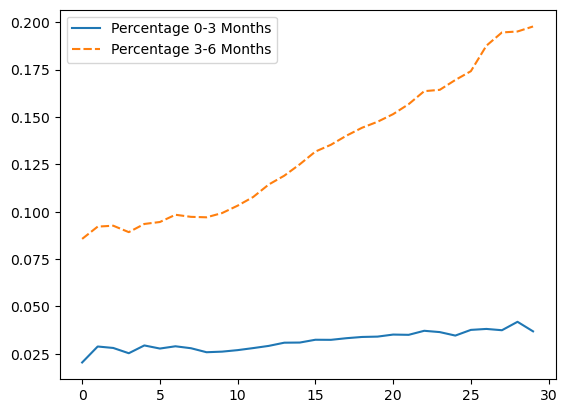

In [109]:
sns.lineplot(data=[new_df['Percentage 0-3 Months'], new_df["Percentage 3-6 Months"]])

Clearly, the percentage of marginal workers working 3-6 months a year is affected much more by illiteracy than those working 0-3 months a year. Any explanation of this phenomena undoubtedly has multiple societal and logistical components, which is beyond our score right now.

---

#### Question 10

Is the relation between literacy and the amount of time worked by marginal workers same across genders?

In [117]:
new_df = pd.DataFrame()
num_divs = 30
arr03 = [[0.0, 0] for _ in range(num_divs)]
arr36 = [[0.0, 0] for _ in range(num_divs)]

# Below loop averages the percentages of different types of workers in certain baskets of literacy rate

for i, row in enumerate(rat_df.values):
    pIll, p03, p36 = row[2], row[27], row[24]
    k = math.floor(pIll*num_divs)
    if k == num_divs:
        k -= 1
    arr03[k][0] = ((arr03[k][0] * arr03[k][1]) + p03) / (arr03[k][1] + 1)
    arr03[k][1] += 1

    arr36[k][0] = ((arr36[k][0] * arr36[k][1]) + p36) / (arr36[k][1] + 1)
    arr36[k][1] += 1

new_df['Male Illiteracy Percent'] = [(i + 0.5)*(100.0/num_divs) for i in range(num_divs)]
new_df['Percentage Male 0-3 Months'] = [arr03[i][0] for i in range(num_divs)]
new_df['Percentage Male 3-6 Months'] = [arr36[i][0] for i in range(num_divs)]


arr03 = [[0.0, 0] for _ in range(num_divs)]
arr36 = [[0.0, 0] for _ in range(num_divs)]

# Below loop averages the percentages of different types of workers in certain baskets of literacy rate

for i, row in enumerate(rat_df.values):
    pIll, p03, p36 = row[1], row[28], row[25]
    k = math.floor(pIll*num_divs)
    if k == num_divs:
        k -= 1
    arr03[k][0] = ((arr03[k][0] * arr03[k][1]) + p03) / (arr03[k][1] + 1)
    arr03[k][1] += 1

    arr36[k][0] = ((arr36[k][0] * arr36[k][1]) + p36) / (arr36[k][1] + 1)
    arr36[k][1] += 1

new_df['Female Illiteracy Percent'] = [(i + 0.5)*(100.0/num_divs) for i in range(num_divs)]
new_df['Percentage Female 0-3 Months'] = [arr03[i][0] for i in range(num_divs)]
new_df['Percentage Female 3-6 Months'] = [arr36[i][0] for i in range(num_divs)]


<Axes: >

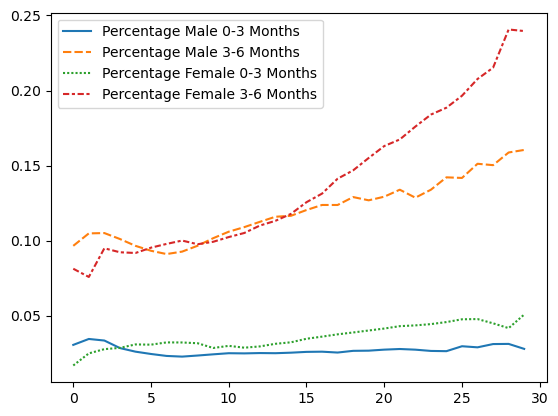

In [119]:
sns.lineplot(data=[new_df['Percentage Male 0-3 Months'], new_df['Percentage Male 3-6 Months'], new_df['Percentage Female 0-3 Months'], new_df['Percentage Female 3-6 Months']])

As can be clearly seen above, in both 0-3 and 3-6 months workers, women are less (in proportion) for literate societies but more for illiterate societies. Thus, in all categories of marginal workers, the proportion of women is more correlated with illiteracy.

Also, notice that in females, the difference in the dependance of 0-3 and 3-6 month workers with illiteracy is more than that in men.